<h1>Techniques of handling missing value</h1>

**1.Mean/ MEdian /Mode imputation**

When should we apply? 

Mean/median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NAN with the most frequent occurance of the variables

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
df = pd.read_csv('titanic.csv', usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [5]:
median= df.Age.median()
median

28.0

In [6]:
def impute_NAN(df,variable,median):
  df[variable+"_median"]=df[variable].fillna(median)

impute_NAN(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [8]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334042
13.019696550973201


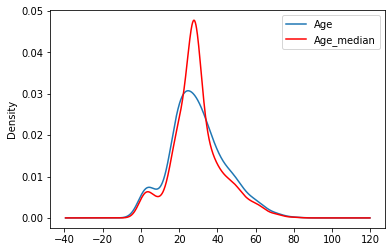

In [10]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

Advantages and Disadvantages of Mean/Median Imputation

Advantages
1. Easy to implement(Robust to outliers)
2. Faster way to obtain the complete dataset.

Disadvantages

1.Change or Distortion in the original variance
2. Impacts Correlation

**2.Random Sample Imputatin**

Aim: Random sample imputation consits of taking random observation from the dataset and we use this observation to replace the nan values.

When should it be used?

It assumes that the data are missig completely at random(MCAR)

In [11]:
 df['Age'].isnull().sum()

177

In [12]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)


423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [13]:

def impute_NAN(df,variable, medain):
  df[variable+"_random"]=df[variable]
  random_sample=df[variable].dropna().sample(df['Age'].isnull().sum(),random_state=0)
  random_sample.index=df[df[variable].isnull()].index
  df.loc[df[variable].isnull(),variable+'_random']=random_sample

impute_NAN(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


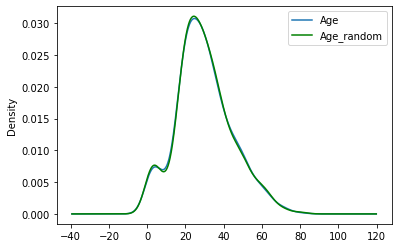

In [14]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

Advantages 
1. Easy to implement
2. There is less distortion in variance.

Disadvantages
1. Every situation randomness won't work.

**3.Capturing NAN values with a new feature.**

It works well if the data are missing completely at random.

In [18]:
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)
df.head(100)

,Survived,Age,Fare,Age_median,Age_random,Age_NAN
0,0,22.0,7.2500,22.0,22.0,0
1,1,38.0,71.2833,38.0,38.0,0
2,1,26.0,7.9250,26.0,26.0,0
3,1,35.0,53.1000,35.0,35.0,0
4,0,35.0,8.0500,35.0,35.0,0
...,...,...,...,...,...,...
95,0,NaN,8.0500,28.0,40.0,1
96,0,71.0,34.6542,71.0,71.0,0
97,1,23.0,63.3583,23.0,23.0,0
98,1,34.0,23.0000,34.0,34.0,0


In [19]:
#Filling the nan values of age with median.
df['Age'].fillna(df.Age.median(),inplace=True)
df.head(50)

,Survived,Age,Fare,Age_median,Age_random,Age_NAN
0,0,22.0,7.2500,22.0,22.00,0
1,1,38.0,71.2833,38.0,38.00,0
2,1,26.0,7.9250,26.0,26.00,0
3,1,35.0,53.1000,35.0,35.00,0
4,0,35.0,8.0500,35.0,35.00,0
5,0,28.0,8.4583,28.0,28.00,1
6,0,54.0,51.8625,54.0,54.00,0
7,0,2.0,21.0750,2.0,2.00,0
8,1,27.0,11.1333,27.0,27.00,0
9,1,14.0,30.0708,14.0,14.00,0


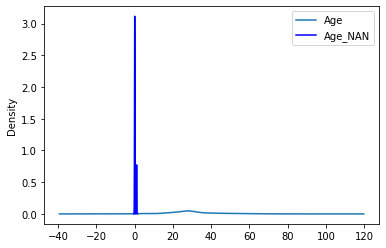

In [20]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_NAN.plot(kind='kde', ax=ax, color='blue')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

Advantages 
1. Easy to implement
2. Captures the importance of missing values 

Disadvantages
1. Creating Additional features which may lead to Curse of dimensionality.